# Customer Churn 


## Create a model to predict whether or not a customer will Churn .

----
----



## Import and Read in the Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [107]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Data Check

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**Check there are no NaN data.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


**Balance of Classes.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

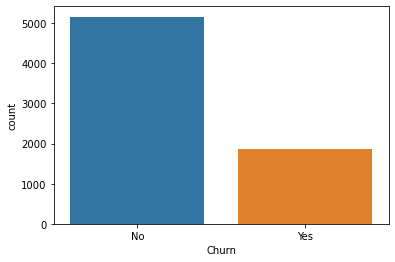

In [7]:
# Check balance of classes

sns.countplot(data=df,x='Churn')

**Distrbution of TotalCharges between Churn categories.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

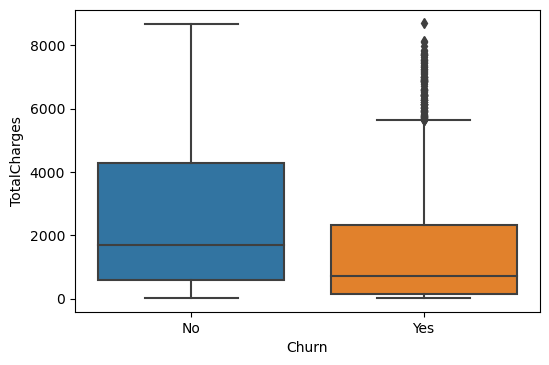

In [33]:
plt.figure(dpi=100)
sns.boxplot(data=df,y='TotalCharges',x='Churn')

**Distribution of TotalCharges per Contract type, seperated by Churn class.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

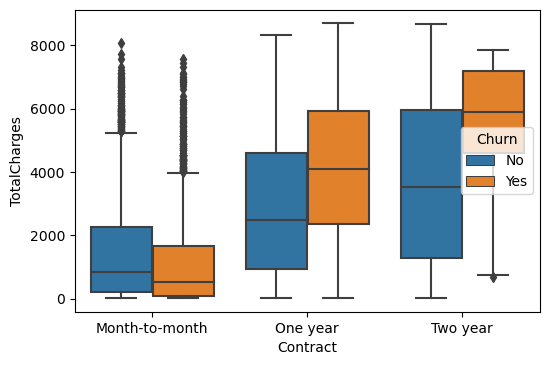

In [34]:
# We can see clear distinction on customer churn between those on shorter contracts versus those on long contracts

plt.figure(dpi=100)

sns.boxplot(data=df,x='Contract',y='TotalCharges',hue ='Churn')

**Bar plot to show the correlation of some features to the class label.**

**Selected features:**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Some features ignored as they have too many unique instances e.g. customerID***

In [15]:
#df.head()

In [35]:
# Creating backup copy dataframe for easy access

df2 = df

In [20]:
#df2.head()

In [36]:
# Selected features dummy variables

pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']],drop_first=True)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,1,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7028,0,0,1,1,1,0,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7029,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
#Dummy variables correlation

pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']],drop_first=True).corr()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,-0.182519,-0.038576,-0.182519,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
gender_Male,-0.001819,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,0.004745,-0.016328,0.004745,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_Yes,0.016957,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,-0.000286,0.143346,-0.000286,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,0.138383,0.080786,0.138383,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.171817,-0.091676,0.171817,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.008392,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.171817,0.091676,-0.171817,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463
MultipleLines_Yes,0.142996,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,-0.210794,0.098592,-0.210794,...,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672
OnlineSecurity_No internet service,-0.182519,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,1.000000,-0.332799,1.000000,...,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694
OnlineSecurity_Yes,-0.038576,-0.016328,0.143346,0.080786,-0.091676,0.091676,0.098592,-0.332799,1.000000,-0.332799,...,-0.332799,0.175514,-0.332799,0.187426,0.100658,0.191698,-0.004051,0.115473,-0.112295,-0.079918
OnlineBackup_No internet service,-0.182519,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,1.000000,-0.332799,1.000000,...,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694


In [108]:
# Save dummy variables correlation to dataframe

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [109]:
corr_df.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes'

In [110]:
len(corr_df.columns)

44

In [111]:
# Feature correlations towards Churn:

corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [113]:
# TOP 5 features that correlate NEGATIVELY with Churn:

pd.DataFrame(corr_df['Churn_Yes'].sort_values()[1:6])

,Churn_Yes
Contract_Two year,-0.301552
DeviceProtection_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
InternetService_No,-0.227578


In [116]:
# TOP 5 features that correlate POSITIVELY with Churn:

pd.DataFrame(corr_df['Churn_Yes'].sort_values()[-6:-1])

,Churn_Yes
PaymentMethod_Electronic check,0.301455
InternetService_Fiber optic,0.307463
TechSupport_No,0.336877
OnlineSecurity_No,0.342235
Contract_Month-to-month,0.404565


# 

In [125]:
# Save correlation to a series
# Remove the first row as it is the 'Churn_No' variable
# Remove the last row as it is the 'Churn_Yes' variable

corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [126]:
# Save correlation to a series
# Remove the first row as it is the 'Churn_No' variable
# Remove the last row as it is the 'Churn_Yes' variable

corryes = pd.DataFrame(corr_df['Churn_Yes'].sort_values().iloc[1:-1])

In [127]:
corryes.index

Index(['Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_No', 'Online

Text(0.5, 1.0, 'Feature correlation to Churn')

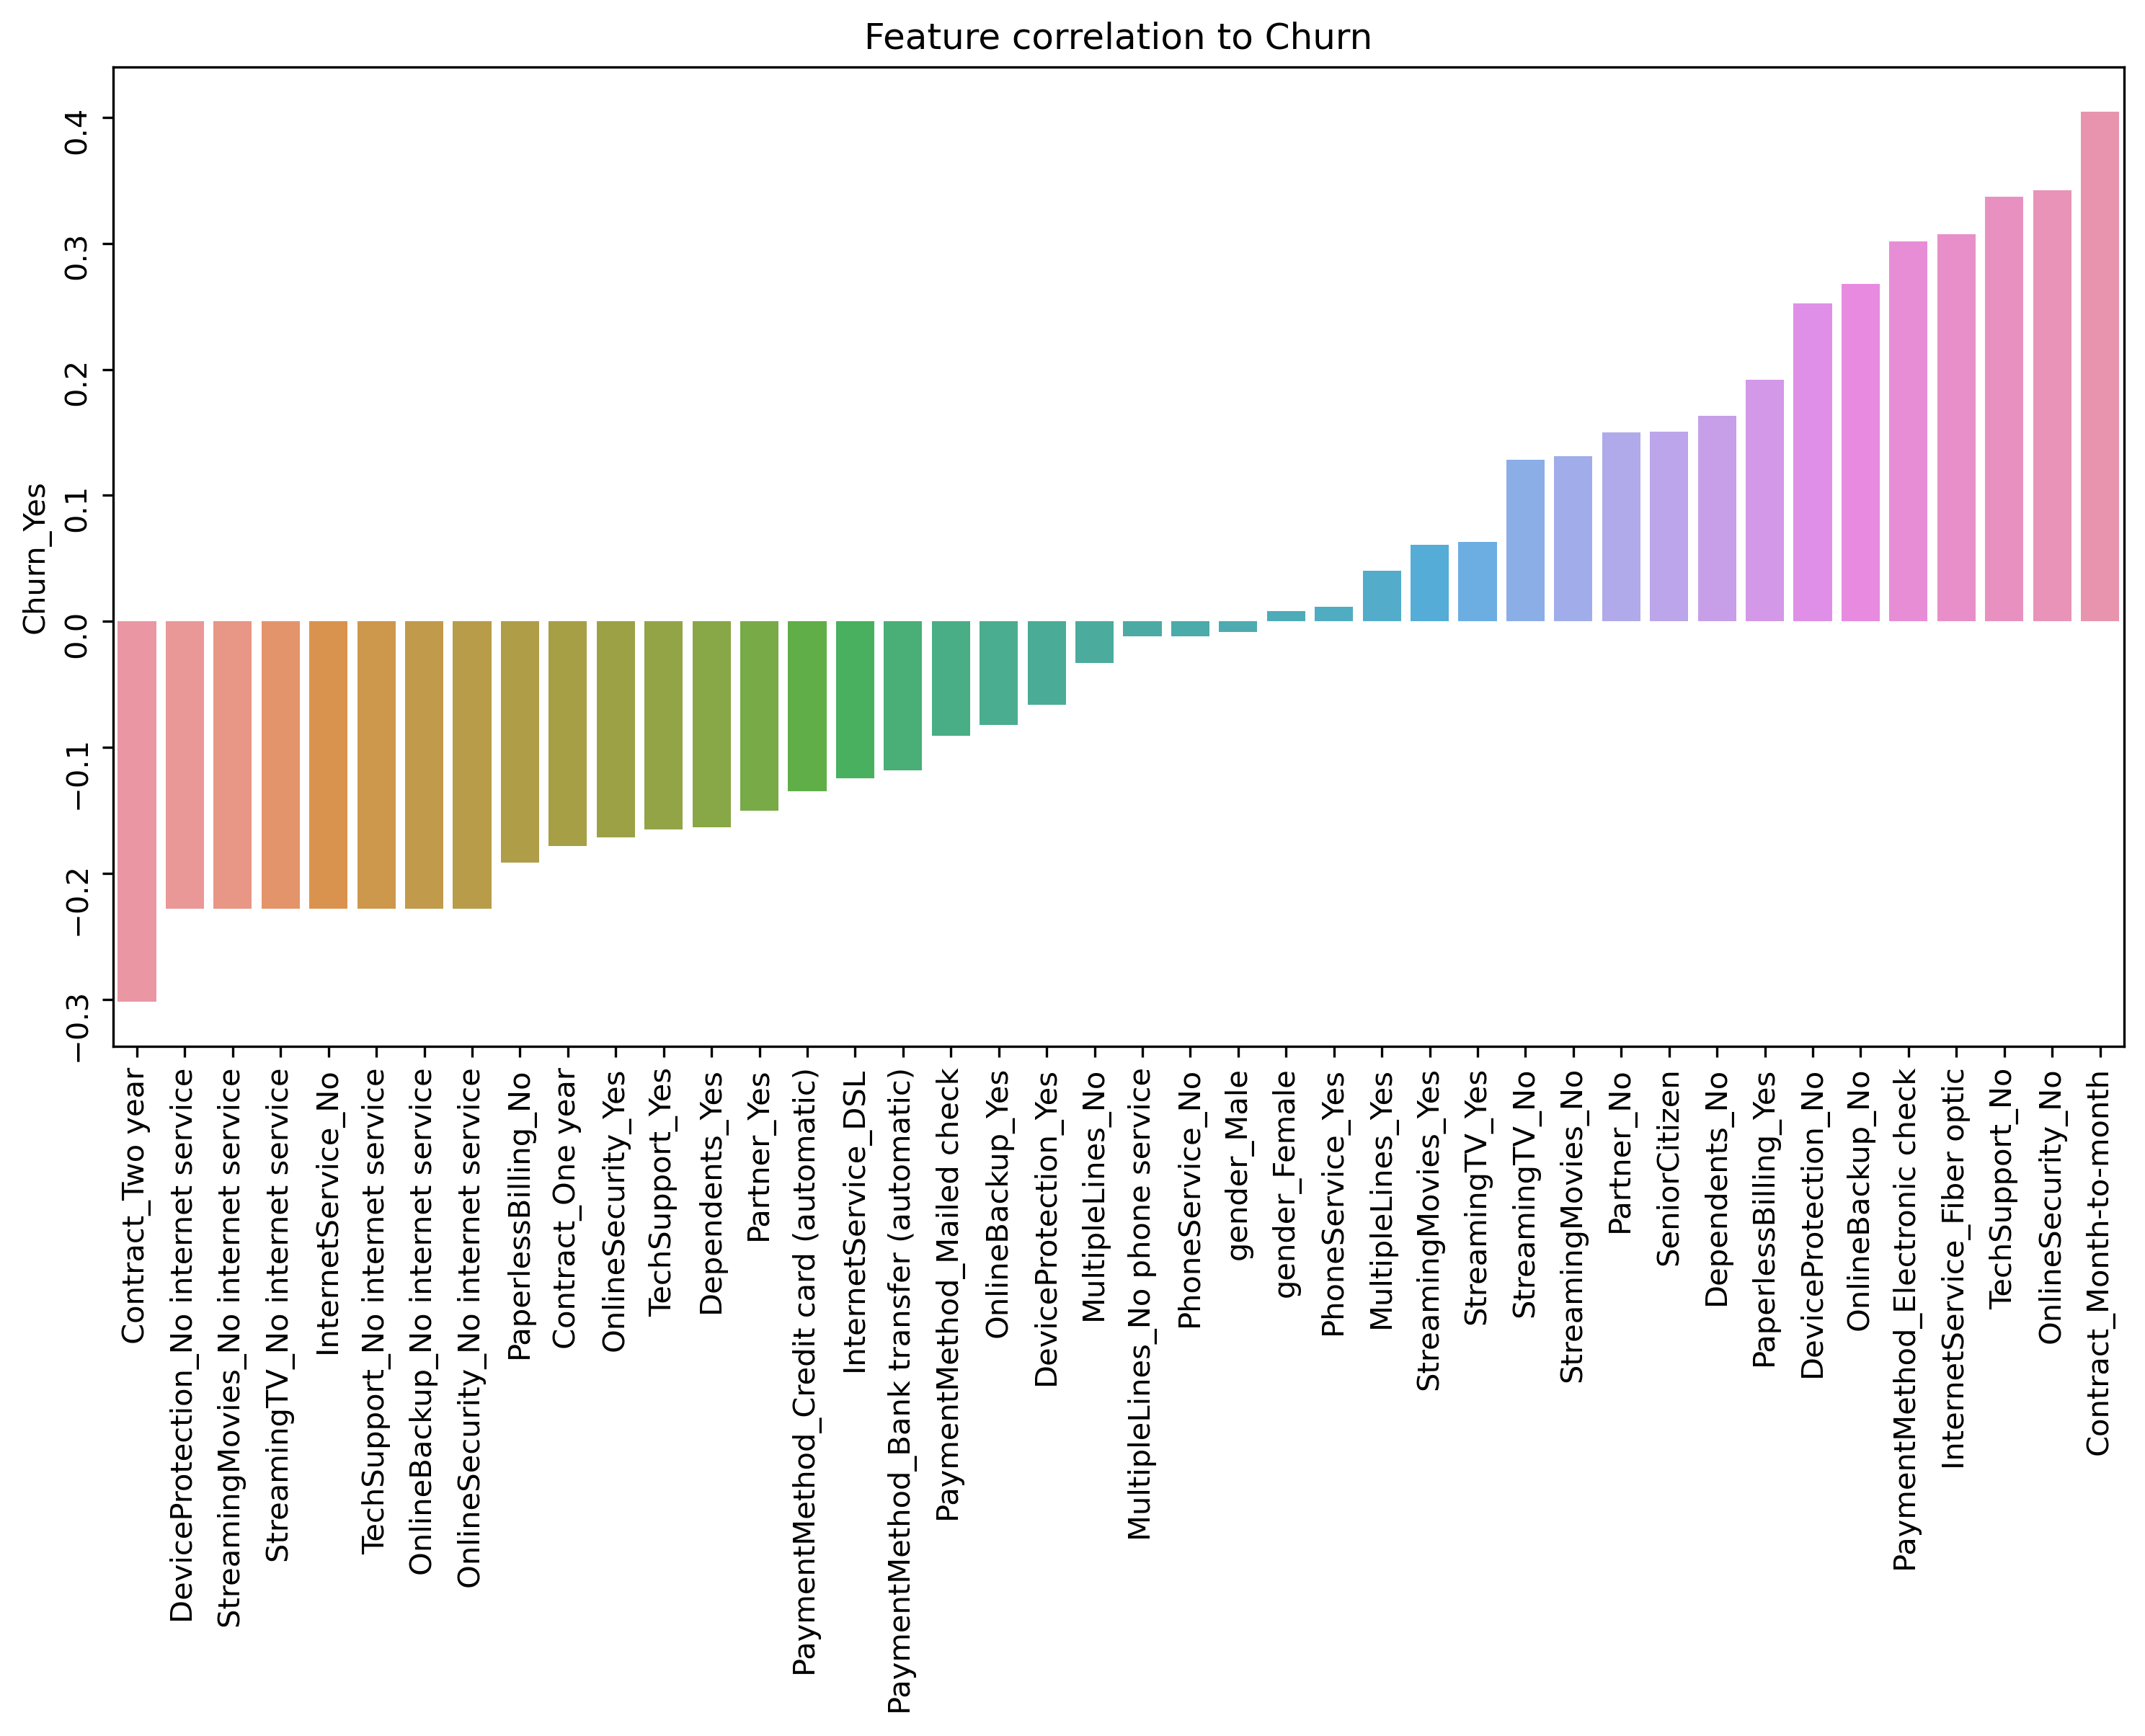

In [133]:
# Bar plot of correlations

plt.figure(dpi=300,figsize=(12,6))
sns.barplot(x=corryes.index,y = corryes['Churn_Yes'] )
plt.tick_params(labelrotation=90)
plt.title("Feature correlation to Churn")

#plt.legend()

# 

---
---

# Part 3: Churn Analysis

**Segementing customers based on their tenure, creating "cohorts", and examining differences between customer cohort segments.**

**The 3 contract types available**

In [135]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Tenure Analysis: represents how long a customer has been a customer (in months).**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

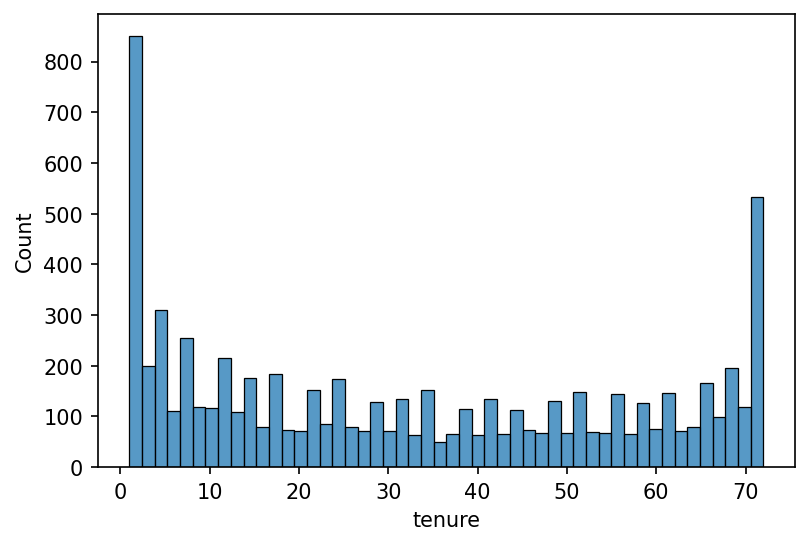

In [137]:
# Histogram distribution to analyse customer tenure

plt.figure(dpi=150)
sns.histplot(data=df,x='tenure',bins=50)

**We can see that there a lot of customers who churned have short tenures lower than 3 months**

**Next, let's analyze the tenure data against Churn and Contract.**

<Figure size 1200x800 with 0 Axes>

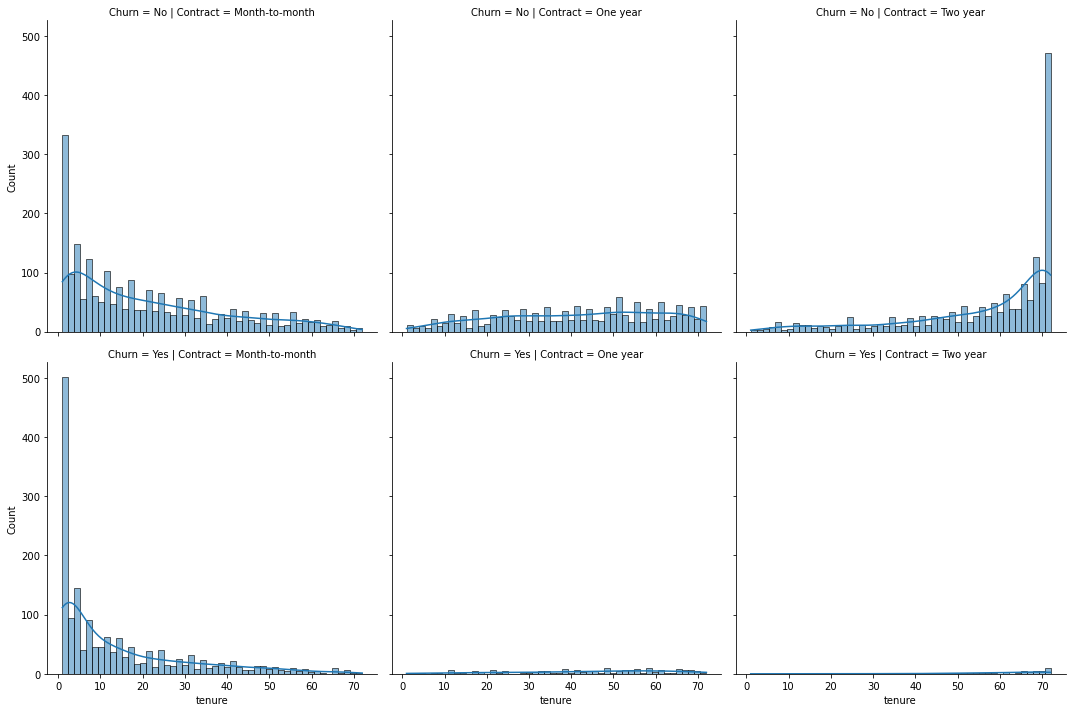

In [142]:
# Histogram (with subplots) showing the distribution of tenure against Contract and Churn

plt.figure(dpi=200)
sns.displot(data=df,x='tenure',bins=50,col='Contract',row='Churn',kde=True)
plt.show;

**We can clearly see that high churn is prevalent in customers who have Month to Month contracts.**
**Conversely, we see high retention in customers who have 2 year contracts**

# 

**Exploring Total Charges versus Monthly Charges:**

In [143]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Visualize scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

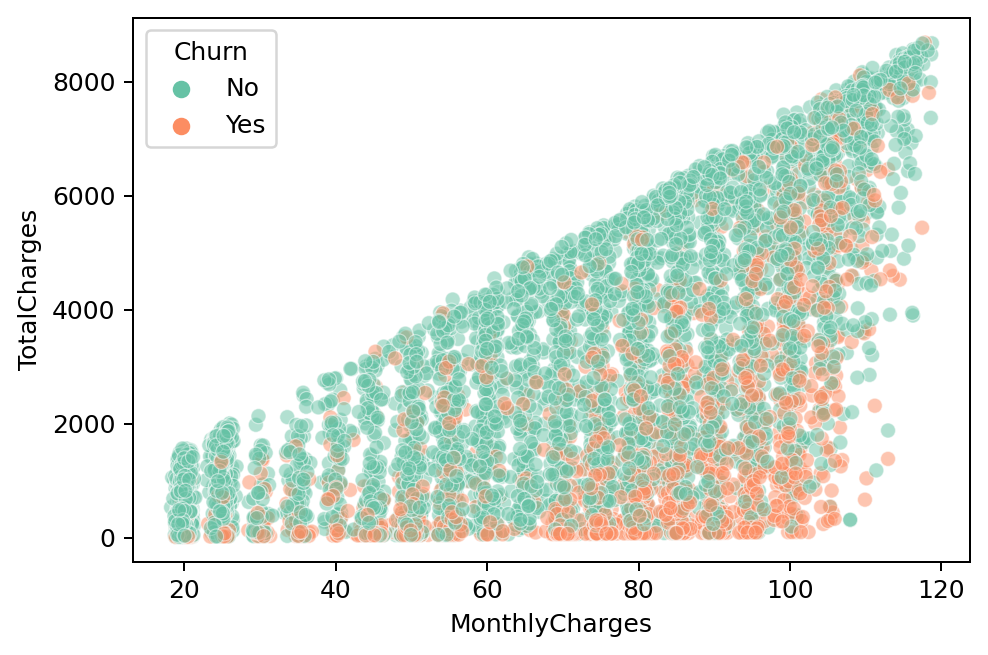

In [152]:
plt.figure(dpi=180)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn',palette='Set2',alpha=0.5)

**We can see from here that the customers who churn the most are the ones with higher monthly charges**

### Cohorts based on Tenure

**We will separate customers by length of their monthly tenures e.g. 1 month, 2 month etc.**

**Then Obtain the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [155]:
#df.head()

In [160]:
#Church Groups

#df.groupby('tenure').count()

In [170]:
#Group customers who churned 'Yes'; by Churn and Tenure

df.groupby(['Churn','tenure']).count().transpose()['Yes']#.iloc[0]

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [180]:
 #Check
    
 #   len(df) == df.groupby(['Churn','tenure']).count().transpose()['Yes'].iloc[0].sum()\
 #   + df.groupby(['Churn','tenure']).count().transpose()['No'].iloc[0].sum()

True

In [183]:
# Stats for those who churned 'YES'

ychurn = df.groupby(['Churn','tenure']).count().transpose()['Yes'] 

In [184]:
# Stats for those who did not churn 'NO'

nchurn = df.groupby(['Churn','tenure']).count().transpose()['No'] 

In [185]:
# Churn Rate for those who churned 'YES'

churnrate = 100*ychurn/(ychurn+nchurn)

In [189]:
#Select one row, count data so same for all rows

churnrate.iloc[0]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

# 

**Visualize Churn Rate per Cohort**

In [197]:
# Convert Churn series to Dataframe

churndf = pd.DataFrame(churnrate.iloc[0])

In [200]:
# Confirmation there are 72 'tenure' months in dataframe

churndf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  72 non-null     float64
dtypes: float64(1)
memory usage: 3.2 KB


Text(0, 0.5, 'Churn Rate')

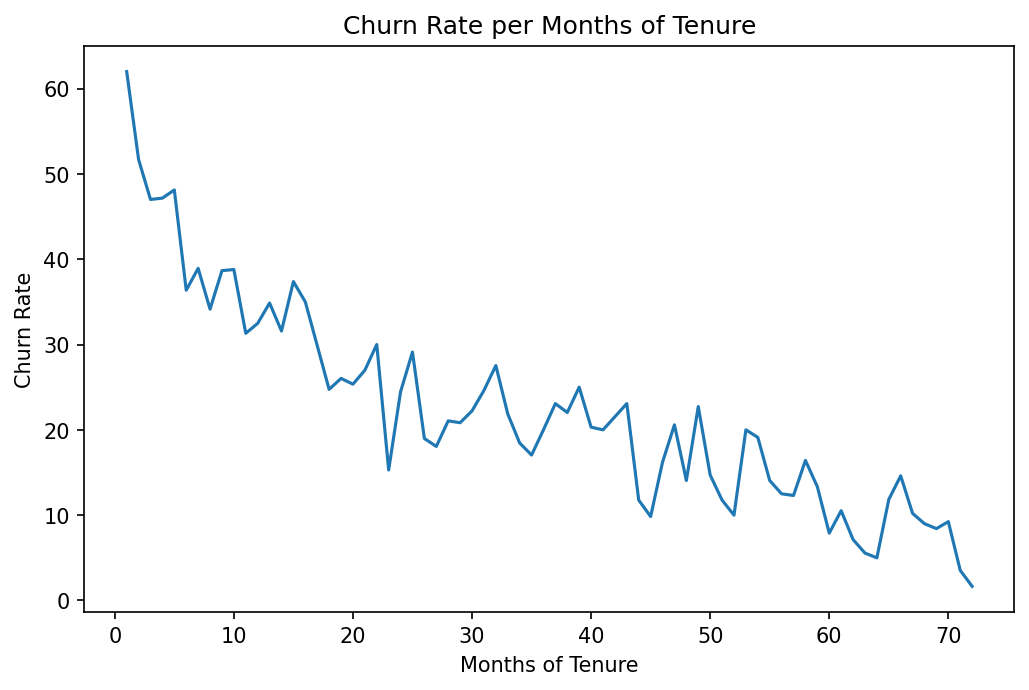

In [214]:
# Line plot of churn rate by number of churned customers

plt.figure(dpi=150,figsize=(8,5))
sns.lineplot(x = churndf.index,y=churndf['customerID'])
plt.title("Churn Rate per Months of Tenure")
plt.xlabel("Months of Tenure")
plt.ylabel("Churn Rate")



# 

In [218]:
ychurn.iloc[0].index[0]

1

In [314]:
dfchurn = pd.DataFrame(ychurn.iloc[0])

In [281]:
dfchurn['customerID'][5]#.index[11]

64

In [285]:
dfchurn = dfchurn.reset_index()

In [265]:
dfchurn.columns

Index(['tenure', 'customerID'], dtype='object')

In [246]:
dfchurn['group'] = ''

In [328]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [330]:
len(df)

7032

### Broader Cohort Groups
**Analyze Tenure Cohort by 4 broader categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [342]:
# Add Tenurt Cohort Groups to the dataframe
# This for loop was quite slow, should return and try npvectorize or a lambda statement

dfcohort = dfcohort.reset_index()

df['group'] = ''

for x in range(len(df)):    
    
    if df['tenure'][x] < 11:
        df['group'][x] = '0-12 Months'
    elif 12 <= df['tenure'][x] <= 23:
        df['group'][x] = '12-24 Months'
    elif 24<= df['tenure'][x] <= 47:
        df['group'][x] = '24-48 Months'
    else:
        df['group'][x] = 'Over 48 Months'

C:\Users\User\AppData\Local\Temp\ipykernel_5612\1321721761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][x] = '0-12 Months'
C:\Users\User\AppData\Local\Temp\ipykernel_5612\1321721761.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][x] = '24-48 Months'
C:\Users\User\AppData\Local\Temp\ipykernel_5612\1321721761.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'][x] = '12-24 Months'
C:\Users\U

In [344]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [351]:
# Save backup copy of df with cohort group data
#dfgroup = df

# 

**Visualize scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort.**

In [355]:
#df.columns

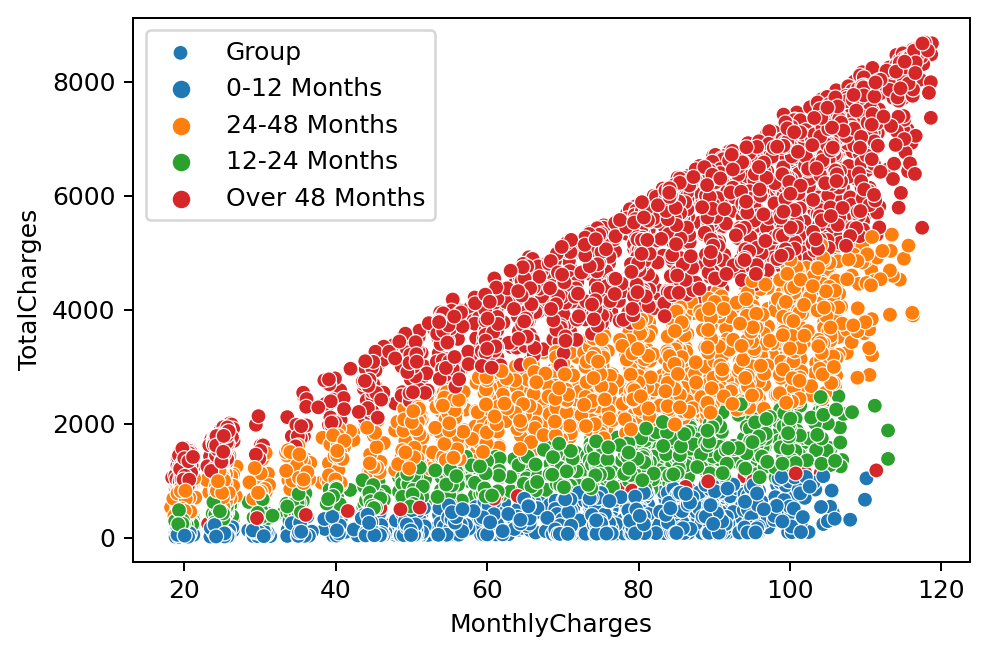

In [362]:
# Scatterplot Visualization

plt.figure(dpi=180)
sns.scatterplot(data=df,x='MonthlyCharges',y ='TotalCharges',hue='group',label='Group')
plt.legend(loc=0)

**We can clearly see that the cohort groups indicating that those who stay longer contribute lower revenues**

**Count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='group', ylabel='count'>

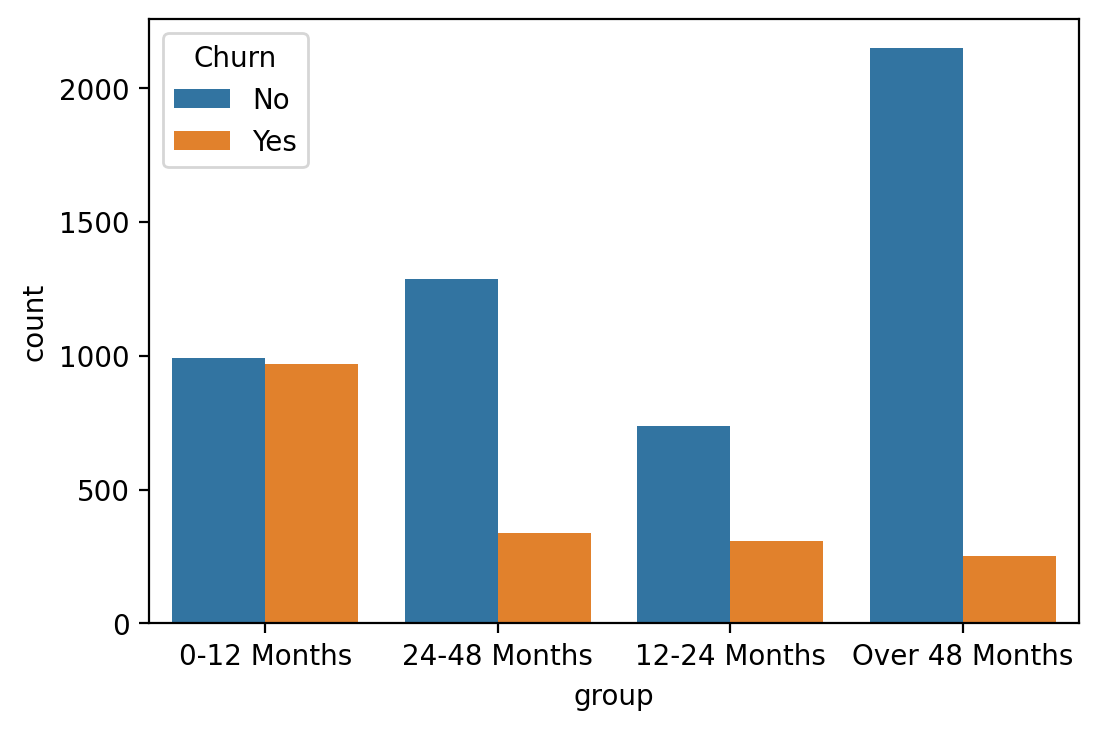

In [364]:
plt.figure(dpi=200)
sns.countplot(data=df,x='group',hue='Churn')

**Expectedly there are lower churn rates from customers who stay longer**

# 

**Count Plots showing counts per Tenure Cohort, separated out by contract type and Churn hue.**

<Figure size 1200x800 with 0 Axes>

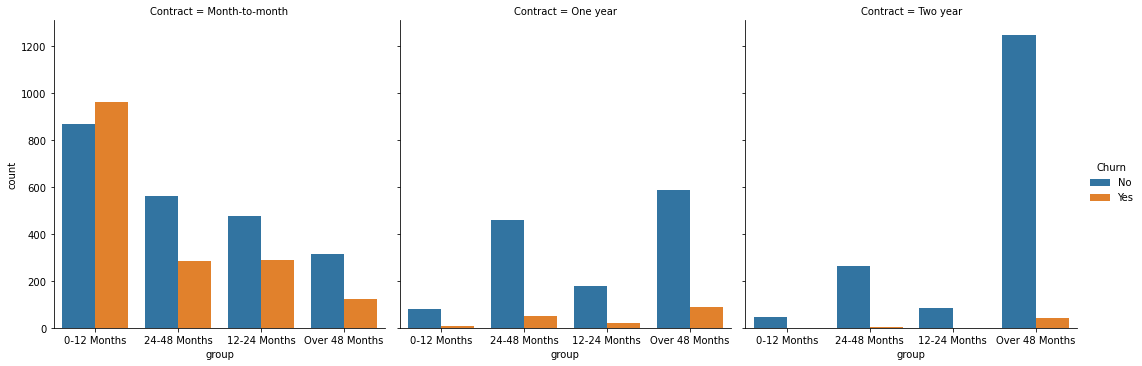

In [383]:
plt.figure(dpi=200)
sns.catplot(data=df,x='group',col='Contract',hue='Churn',kind='count')

-----

# Part 4: Predictive Modeling

**Work with these selected 3 tree based methods: A Single Decision Tree, Random Forest & AdaBoost.**


## Single Decision Tree

**Import Modules**

In [384]:
#IMPORT MODELS

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#IMPORT PERF METRICS

from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_absolute_error,mean_squared_error


In [386]:
#df.head()

In [387]:
# Name first variable X2 for ease

X2 = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X2,drop_first=True)
y = df['Churn']

In [388]:
#TEST DATA SPLIT; 10% set as test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

              precision    recall  f1-score   support

          No       0.86      0.79      0.82       557
         Yes       0.38      0.50      0.44       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.63       704
weighted avg       0.76      0.73      0.74       704

Accuracy score: 72.72727272727273


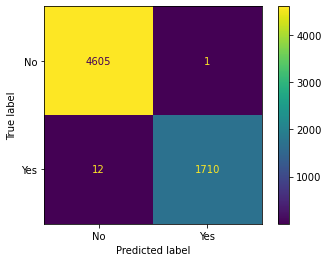

In [389]:
# MODEL

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.predict(X_test)
ypreds = model.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(model,X_train,y_train)

**Single Decision Tree performs reasonably well albeit with low F1 score, precision and recall might be hard to replicate on a different data set**

# 

**Visualize Feature Importances**

In [447]:
feats = pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['Features_Importances'])

In [454]:
feats = feats.sort_values('Features_Importances')

In [456]:
feats = feats[feats['Features_Importances']>0]

Text(0.5, 1.0, 'Feature Importances')

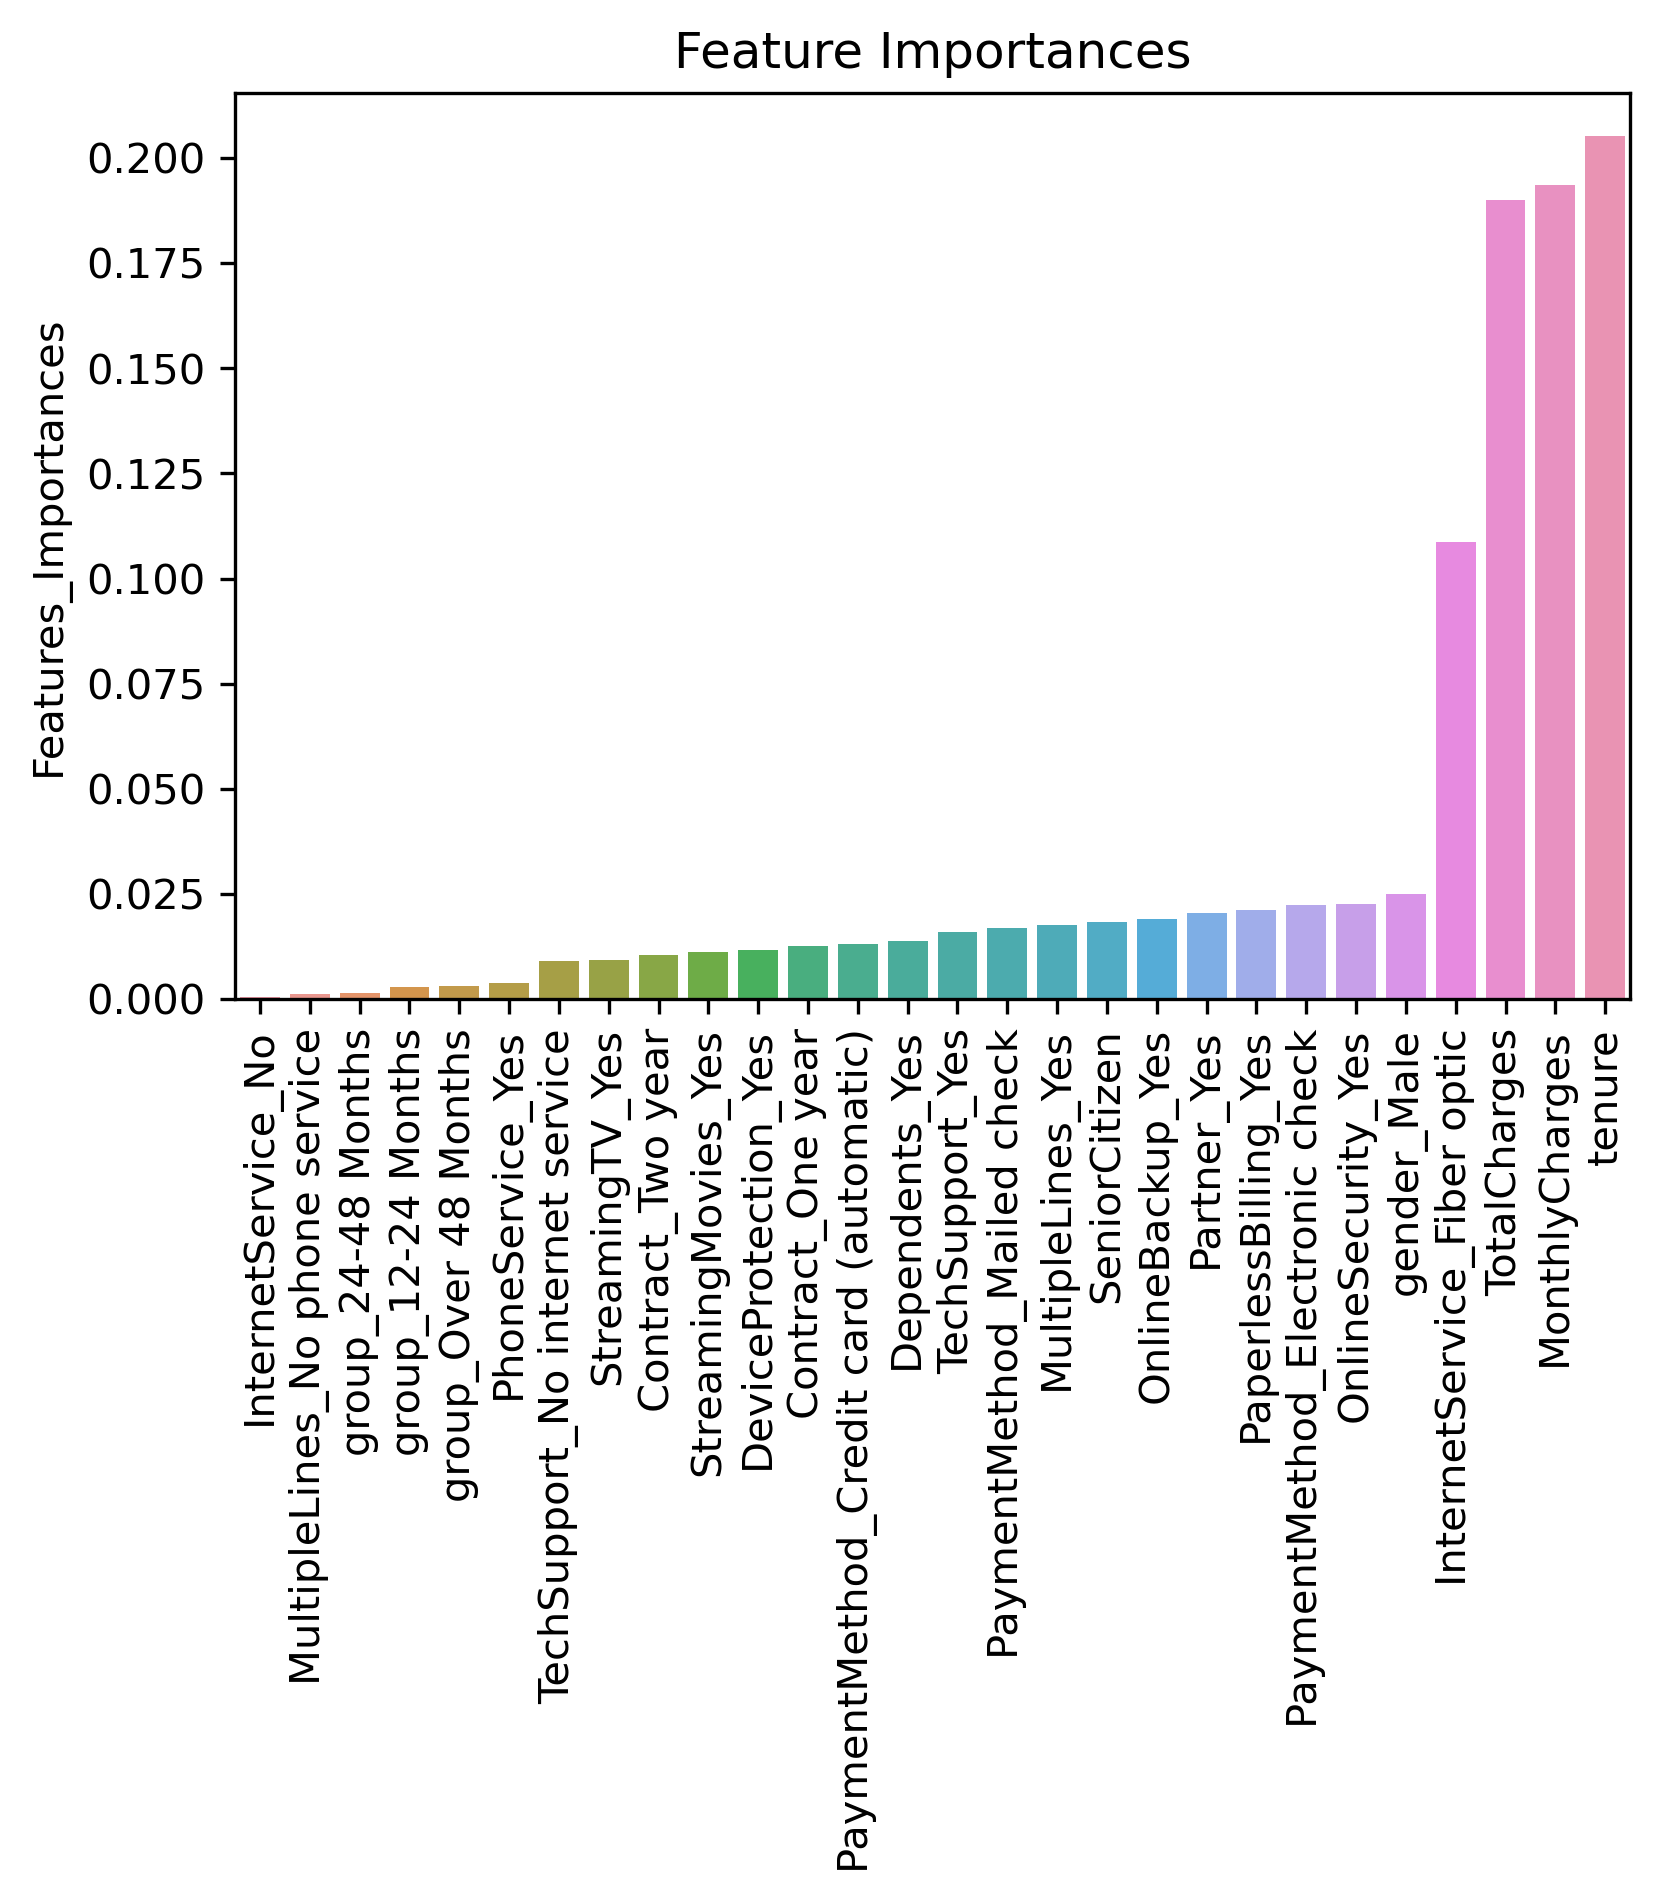

In [466]:
plt.figure(dpi=300)
sns.barplot(data = feats, x = feats.index, y = 'Features_Importances')
plt.tick_params(axis='x',labelrotation=90)
plt.title("Feature Importances")

## Random Forest

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704

Accuracy score: 79.4034090909091


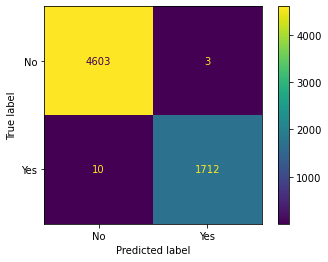

In [469]:
# MODEL

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.predict(X_test)
ypreds = model.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(model,X_train,y_train)

## Boosted Trees

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704

Accuracy score: 82.95454545454545


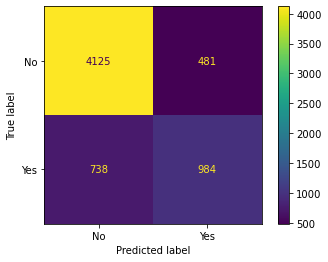

In [470]:
# MODEL

model = AdaBoostClassifier()
model.fit(X_train,y_train)
model.predict(X_test)
ypreds = model.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(model,X_train,y_train)

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!